# Libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Typing
from typing import List

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1 Loading The Data Pipeline

In [2]:
# Data Collection
df = pd.read_csv('C:/Users/Nadir/Desktop/satisfaction.csv')

# List of columns to fill missing values
columns_to_fill = ['Flight Distance', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']
# Alternatively, you can do it in a more concise way using the `apply` method
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(int(x.mean())))

# List of satisfaaction columns
columns_to_tweak = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service', 'Cleanliness']
# Iterate over each column and set values to 3 where the value is 0
for column in columns_to_tweak:
    df.loc[df[column] == 0, column] = 3

# Drop rows where any value is missing
df = df.dropna()
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=columns_to_drop)

# Override 'Departure Delay in Minutes' with 'Total Delay'
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df.rename(columns={'Departure Delay in Minutes': 'Total Delay'}, inplace=True)
# Drop 'Arrival Delay in Minutes' column
df.drop(columns=['Arrival Delay in Minutes'], inplace=True)

# Initialize the LabelEncoder
encoder = LabelEncoder()
# Encode binary columns
binary_columns = ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for column in binary_columns:
    df[column] = encoder.fit_transform(df[column])

# Define the order of classes for ordinal encoding
class_order = ['Eco', 'Eco Plus', 'Business']
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[class_order])
# Fit and transform the 'Class' column
df['Class'] = ordinal_encoder.fit_transform(df[['Class']])
# Convert encoded values to integer type
df['Class'] = df['Class'].astype(int)

# Extract the other column names (excluding the last one)
columns_to_scale = df.columns[:-1]
# Initialize the StandardScaler
scaler = StandardScaler()
# Standard scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
0,-0.985344,-0.475348,0.817874,-0.664253,-1.077964,-1.043130,1.756919,0.587624,0.083904,0.798600,...,-0.341221,1.227170,1.259165,1.261068,1.162371,-1.034961,1.149963,1.302583,0.876484,1
1,-0.985344,-0.475348,-0.239923,-0.664253,1.001932,1.688678,-1.462277,-1.628957,0.083904,-1.541788,...,1.173810,0.480031,0.478608,0.490583,0.312703,-0.247179,0.301451,1.302583,-0.391302,1
2,1.014874,2.103723,-1.297721,-0.664253,-1.077964,-1.010789,-0.657478,-0.151236,-0.699404,0.798600,...,-1.098737,-1.014246,0.478608,-1.820871,-0.536964,-1.034961,-1.395575,-0.975655,-0.391302,0
3,1.014874,-0.475348,0.288975,-0.664253,1.001932,2.208156,0.147321,-0.151236,0.083904,-0.761659,...,0.416295,-1.761385,-1.863064,-1.820871,-2.236298,-0.247179,-2.244087,0.543170,-0.310380,1
4,-0.985344,-0.475348,0.619537,-0.664253,-1.077964,-0.010238,-0.657478,-0.151236,0.867212,0.018471,...,-1.098737,-1.014246,-1.082507,-1.050386,-1.386631,0.540602,-1.395575,0.543170,-0.121561,1


## 2 Data Splitting

In [3]:
# Assuming df is your DataFrame
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable (assuming the last column is the target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=29, stratify=y)

## 3 Model Selection

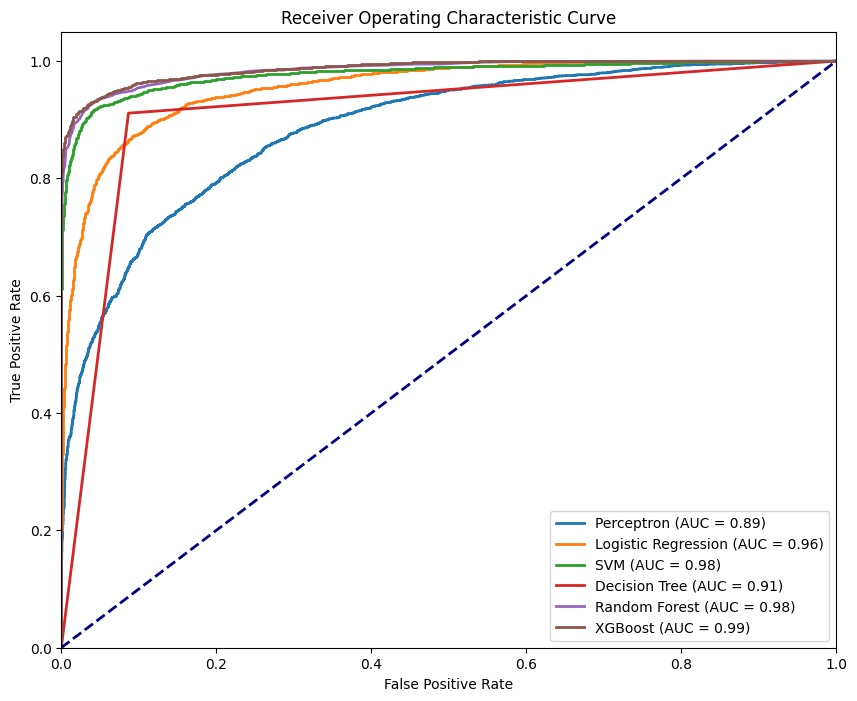

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Perceptron,0.831265,0.804303,0.835866,0.689223,0.755495,0.885634
1,Logistic Regression,0.881211,0.888959,0.870384,0.877551,0.873953,0.955954
2,SVM,0.931313,0.938747,0.949159,0.909058,0.928676,0.977867
3,Decision Tree,0.906392,0.912361,0.891419,0.911207,0.901204,0.912235
4,Random Forest,0.938904,0.945657,0.961872,0.912281,0.936420,0.984801
5,XGBoost,0.944715,0.947856,0.957265,0.922306,0.939460,0.986785


In [4]:
def evaluate_models(X_train, y_train, X_test, y_test) -> pd.DataFrame:
    """  
    Evaluate different classification models and compare their performance.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Testing features.
    y_test (array-like): Testing labels.

    Returns:
    pd.DataFrame: A DataFrame containing model names, training and testing performance metrics, and standard deviations.
    """

    # Initialize models
    models = [
        ('Perceptron', Perceptron()),
        ('Logistic Regression', LogisticRegression()),
        ('SVM', SVC()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', XGBClassifier())
    ]

    # Initialize result DataFrame
    result = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

    # Plot ROC for all models
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Cross-validation
        kfold = StratifiedKFold(n_splits=5)
        cross_val_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Train the model with class weights
        model.fit(X_train, y_train)
        
        # Test the model
        predictions   = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, predictions)
        precision     = precision_score(y_test, predictions, zero_division=0)
        recall        = recall_score(y_test, predictions)
        f1            = f1_score(y_test, predictions)
        
        # Check if the model has predict_proba method
        if hasattr(model, 'predict_proba'):
            prob_pos = model.predict_proba(X_test)[:, 1]  # Probability of positive class
        else:  # If not, use decision_function
            prob_pos = model.decision_function(X_test)

        roc_auc = roc_auc_score(y_test, prob_pos)  # Calculate ROC-AUC
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

        # Store results
        result.loc[len(result)] = [model_name, cross_val_result.mean(), test_accuracy, precision, recall, f1, roc_auc]
    
    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

    return result

evaluate_models(X_train, y_train, X_test, y_test)

XGBoost it is!
## 4 Model Tuning (XGBoost)
There are 3 types of parameters:
1. Global parameters
2. Booster parameters
3. Learning Task parameters

In [5]:
# Initialize the XGBClassifier
xgbc_model = XGBClassifier()

# Fine-tuning parameters
param_grid = {
    'booster': ['gbtree'],
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0, 3],
    'n_estimators': [100, 200],
    'max_depth': [6, 9],
    'min_child_weight': [1, 5],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'colsample_bylevel': [0.5, 1],
    'colsample_bynode': [0.5, 1],
    'seed': [7]
}

# Initialize Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgbc_model, param_grid=param_grid, cv=kfold, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Access the best estimator directly
best_estimator_params = grid_search.best_estimator_.get_params()
best_estimator_params

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 0.5,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.1,
 'seed': 7}

In [6]:
# Now you can create a new RandomForestClassifier using the best parameters
best_xgbc_model = XGBClassifier(**best_estimator_params)

best_xgbc_model.fit(X_train,y_train)

# Make predictions on the training set
y_pred_train_xgbc = best_xgbc_model.predict(X_train)

# Calculate accuracy on the training set
accuracy_train_xgbc = accuracy_score(y_train, y_pred_train_xgbc)

# Make predictions on the test set
y_pred_test_xgbc = best_xgbc_model.predict(X_test)

# Calculate metrics on the test set
accuracy_test_xgbc = accuracy_score(y_test, y_pred_test_xgbc)
precision_test_xgbc = precision_score(y_test, y_pred_test_xgbc)
recall_test_xgbc = recall_score(y_test, y_pred_test_xgbc)
f1_test_xgbc = f1_score(y_test, y_pred_test_xgbc)
roc_auc_test_xgbc = roc_auc_score(y_test, y_pred_test_xgbc)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_xgbc)

print(f"Train Accuracy: {accuracy_train_xgbc:.4f}")
print(f"Test Accuracy: {accuracy_test_xgbc:.4f}")
print(f"Precision: {precision_test_xgbc:.4f}")
print(f"Recall: {recall_test_xgbc:.4f}")
print(f"F1-score: {f1_test_xgbc:.4f}")
print(f"ROC AUC: {roc_auc_test_xgbc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Train Accuracy: 0.9989
Test Accuracy: 0.9493
Precision: 0.9629
Recall: 0.9198
F1-score: 0.9409
ROC AUC: 0.9460
Confusion Matrix:
[[3475   99]
 [ 224 2569]]


In [7]:
# Whole set
y_pred_xgbc = best_xgbc_model.predict(X)

# Calculate metrics on the whole set
accuracy_xgbc = accuracy_score(y, y_pred_xgbc)
precision_xgbc = precision_score(y, y_pred_xgbc)
recall_xgbc = recall_score(y, y_pred_xgbc)
f1_xgbc = f1_score(y, y_pred_xgbc)
roc_auc_xgbc = roc_auc_score(y, y_pred_xgbc)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_xgbc)

print(f"Accuracy: {accuracy_xgbc:.4f}")
print(f"Precision: {precision_xgbc:.4f}")
print(f"Recall: {recall_xgbc:.4f}")
print(f"F1-score: {f1_xgbc:.4f}")
print(f"ROC AUC: {roc_auc_xgbc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9865
Precision: 0.9909
Recall: 0.9782
F1-score: 0.9845
ROC AUC: 0.9856
Confusion Matrix:
[[14194   100]
 [  244 10930]]


In [8]:
df['predicted_satisfaction'] = y_pred_xgbc
df[["satisfaction", "predicted_satisfaction"]].head()

,satisfaction,predicted_satisfaction
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [9]:
(df["satisfaction"] != df["predicted_satisfaction"]).sum()

344

## 5 Feature Importance
Using Feature Importance Plot

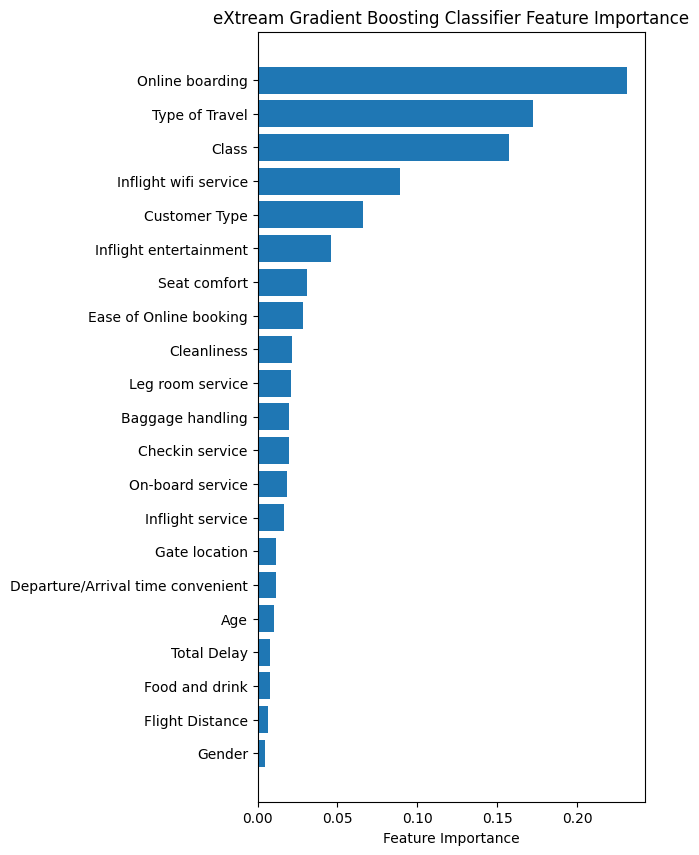

In [10]:
# Create a subplot with desired aspect ratio
fig, ax = plt.subplots(figsize=(5, 10))  # Adjust the size here (width, height)

# Plot feature importance
importances = best_xgbc_model.feature_importances_
indices = np.argsort(importances)[::-1]
ax.barh(range(X_train.shape[1]), importances[indices], align='center')
ax.set_yticks(range(X_train.shape[1]))
ax.set_yticklabels([X_train.columns[i] for i in indices])
ax.invert_yaxis()  # Invert y-axis to have the most important feature at the top
ax.set_xlabel('Feature Importance')
ax.set_title('eXtream Gradient Boosting Classifier Feature Importance')

plt.show()

## 6 Recommendations (Top 5 features)
### 6.1 Feature Analysis

In [11]:
df_copy=df.copy()

inverse_scaled_data = scaler.inverse_transform(df[columns_to_scale])

# Update columns with inverse scaled values
df_copy[columns_to_scale] = inverse_scaled_data

Text(0, 0.5, 'Count')

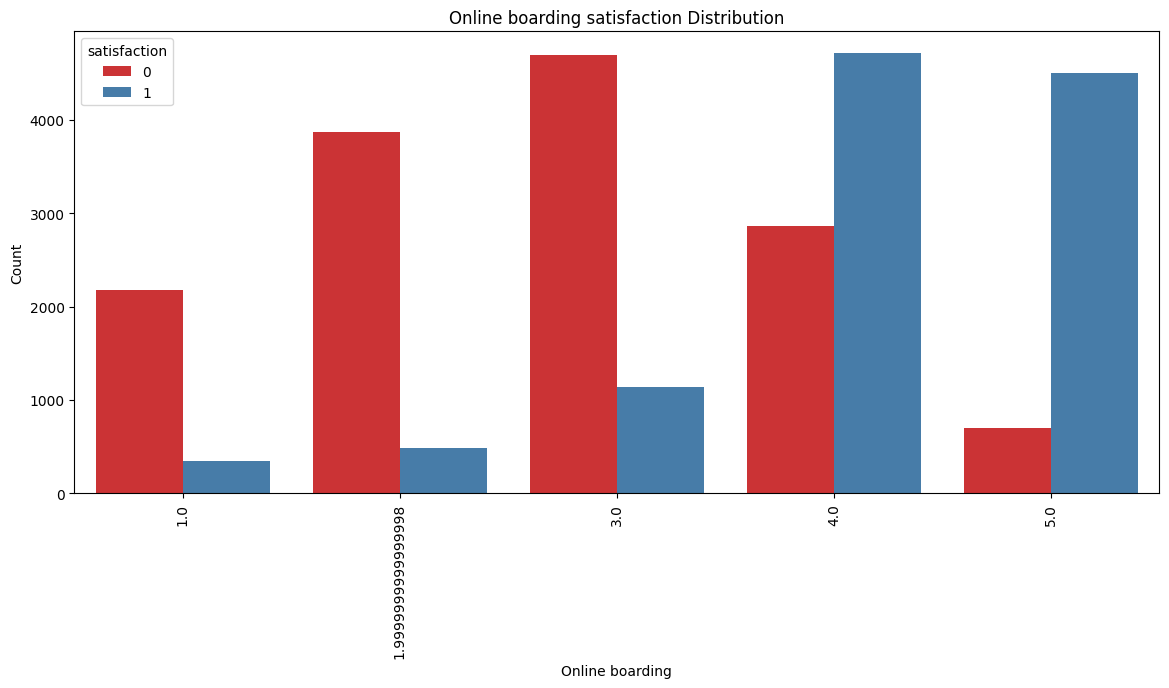

In [12]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Online boarding', hue='satisfaction', palette='Set1')
plt.title('Online boarding satisfaction Distribution')
plt.xlabel('Online boarding')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

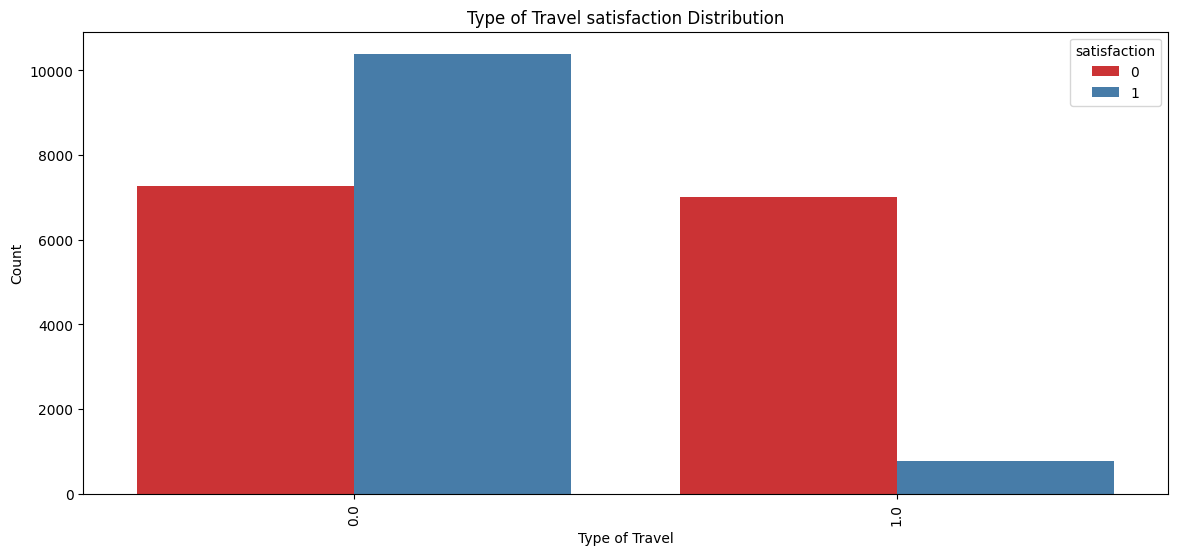

In [13]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Type of Travel', hue='satisfaction', palette='Set1')
plt.title('Type of Travel satisfaction Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

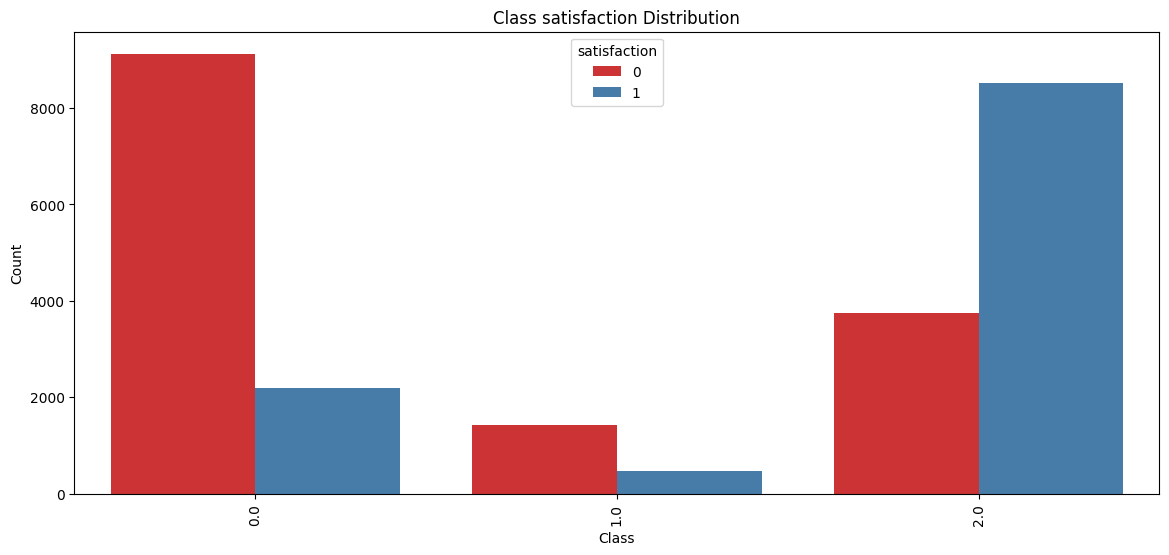

In [14]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Class', hue='satisfaction', palette='Set1')
plt.title('Class satisfaction Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

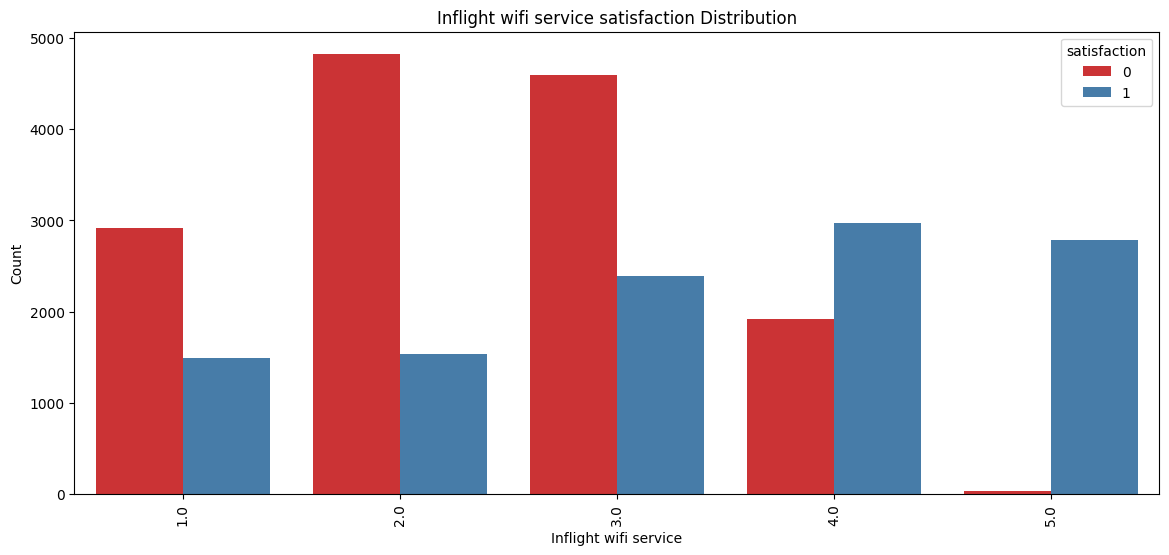

In [15]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Inflight wifi service', hue='satisfaction', palette='Set1')
plt.title('Inflight wifi service satisfaction Distribution')
plt.xlabel('Inflight wifi service')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

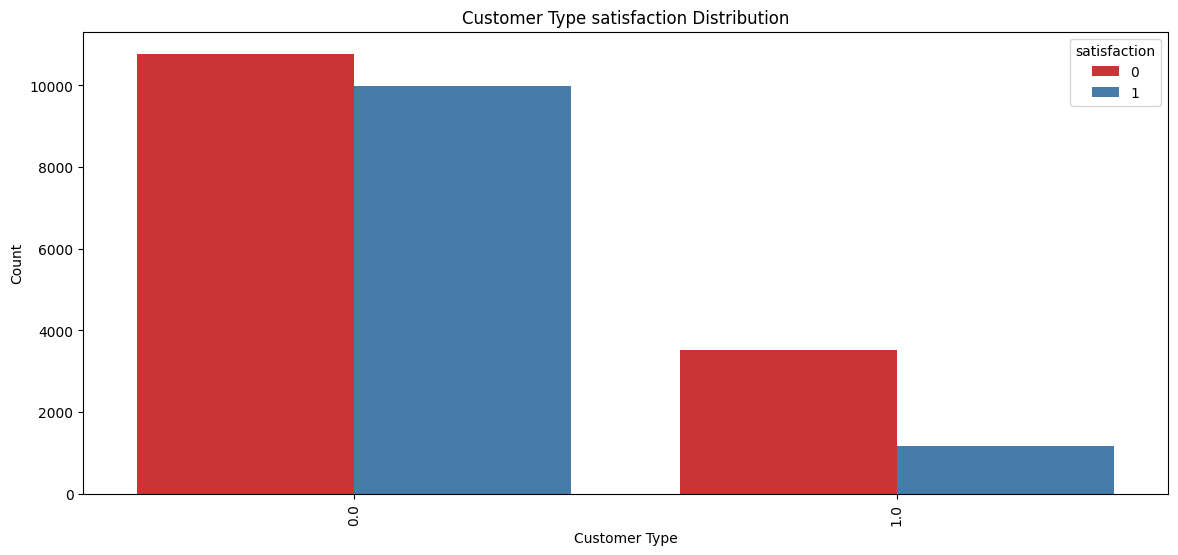

In [16]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_copy, x='Customer Type', hue='satisfaction', palette='Set1')
plt.title('Customer Type satisfaction Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')

### 6.2 Feature Tweaking

In [17]:
# Count occurrences where the column's value is True or 1
original_dissatisfaction = (df['satisfaction']==0).sum()

# Clone DataFrame for each experiment
X1 = df[columns_to_scale].copy()
X2 = df[columns_to_scale].copy()
X3 = df[columns_to_scale].copy()
X4 = df[columns_to_scale].copy()
X5 = df[columns_to_scale].copy()
Xf = df[columns_to_scale].copy()

# Update columns with inverse scaled values
X1[columns_to_scale] = inverse_scaled_data
X2[columns_to_scale] = inverse_scaled_data
X3[columns_to_scale] = inverse_scaled_data
X4[columns_to_scale] = inverse_scaled_data
X5[columns_to_scale] = inverse_scaled_data
Xf[columns_to_scale] = inverse_scaled_data

# Experiment 1: Cap 'Online boarding satisfaction' to at least 4
FallingShort_4 = X1['Online boarding'] < 4
X1.loc[FallingShort_4, 'Online boarding'] = 4  # Cap the value at type rating of 4

# Experiment 2: Cap 'Type of Travel' to Business Travel
X2['Type of Travel'] = 0

# Experiment 3: Cap 'Class' to Buisness
X3['Class'] = 2

# Experiment 4: Cap 'Inflight wifi service satisfaction' to at least 4
FallingShort_4 = X4['Inflight wifi service'] < 4
X4.loc[FallingShort_4, 'Inflight wifi service'] = 4  # Cap the value at type rating of 4

# Experiment 5: Cap 'Customer Type' to loyal Customer
X5['Customer Type'] = 0

# Final Experiment: 
FallingShort_4 = Xf['Online boarding'] < 4
Xf.loc[FallingShort_4, 'Online boarding'] = 4
Xf['Type of Travel'] = 0
FallingShort_4 = Xf['Inflight wifi service'] < 4
Xf.loc[FallingShort_4, 'Inflight wifi service'] = 4
Xf['Customer Type'] = 0

# Scale the modified data
X1_scaled = scaler.transform(X1)
X2_scaled = scaler.transform(X2)
X3_scaled = scaler.transform(X3)
X4_scaled = scaler.transform(X4)
X5_scaled = scaler.transform(X5)
Xf_scaled = scaler.transform(Xf)

# Predictions for each experiment
y1 = best_xgbc_model.predict(X1_scaled)
y2 = best_xgbc_model.predict(X2_scaled)
y3 = best_xgbc_model.predict(X3_scaled)
y4 = best_xgbc_model.predict(X4_scaled)
y5 = best_xgbc_model.predict(X5_scaled)
yf = best_xgbc_model.predict(Xf_scaled)

# Calculate turnover for each experiment
new_rating1 = (y1 == 0).sum()
new_rating2 = (y2 == 0).sum()
new_rating3 = (y3 == 0).sum()
new_rating4 = (y4 == 0).sum()
new_rating5 = (y5 == 0).sum()
new_ratingf = (yf == 0).sum()

# Output results
print(f"Original dissatisfaction count: {original_dissatisfaction}")
print(f"Dissatisfaction count after increasing 'Online boarding satisfaction' to at least 4: {new_rating1}")
print(f"Dissatisfaction count after caping 'Type of Travel' at 0 buisness class satisfaction: {new_rating2}")
print(f"Dissatisfaction count after caping 'Class' at 2 buisness class satisfaction: {new_rating3}")
print(f"Dissatisfaction count after increasing 'Inflight wifi service satisfaction' to 4: {new_rating4}")
print(f"Dissatisfaction count after limiting 'Customer Type' to loyal Customer: {new_rating5}")

Original dissatisfaction count: 14294
Dissatisfaction count after increasing 'Online boarding satisfaction' to at least 4: 14442
Dissatisfaction count after caping 'Type of Travel' at 0 buisness class satisfaction: 10663
Dissatisfaction count after caping 'Class' at 2 buisness class satisfaction: 14532
Dissatisfaction count after increasing 'Inflight wifi service satisfaction' to 4: 12834
Dissatisfaction count after limiting 'Customer Type' to loyal Customer: 12704


#### 6.2.1 Online boarding
- **Analysis:** Increasing this satisfaction level has resulted in a slight increase in dissatisfaction count. This might suggest that while online boarding is important, there might be other factors contributing more significantly to dissatisfaction. However, it's still an essential factor to consider.

- **Recommendations:**
  - Continue focusing on improving online boarding processes and user experience.
  - Conduct surveys or gather feedback to identify specific pain points and areas for improvement.
  
#### 6.2.2 Type of Travel:
- **Analysis:** Capping the dissatisfaction for non-business class travelers has significantly reduced dissatisfaction count. This indicates that dissatisfaction among non-business class travelers was a major contributor to overall dissatisfaction.

- **Recommendations:**
  - Focus on enhancing the travel experience for non-business class passengers. This could involve offering personalized services, improving amenities, or providing incentives to enhance satisfaction levels.
  
#### 6.2.3 Class:
- **Analysis:** This intervention also increased dissatisfaction slightly, similar to the first intervention. This suggests that simply changing the class without addressing other factors does not improve overall satisfaction.

- **Recommendations:**
  - Improve the overall experience for business class passengers by enhancing service quality, comfort, and additional amenities.
  - Address other related factors that might influence their satisfaction.

#### 6.2.4 Inflight Wifi Service Satisfaction:
- **Analysis:** Increasing satisfaction with inflight wifi service has led to a reduction in dissatisfaction count. This indicates that the availability and quality of wifi service significantly impact passenger satisfaction.

- **Recommendations:**
  - Invest in upgrading and maintaining high-quality inflight wifi services.  - 
  - Ensure seamless connectivity and consider offering complimentary or affordable wifi packages to enhance satisfaction levels.

#### 6.2.5 Customer Type Satisfaction:
- **Analysis:** This intervention reduced dissatisfaction, showing that loyal customers tend to be more satisfied. This could be due to their familiarity with the services or benefits they receive as loyal customers.

- **Recommendations:**
  - Develop and enhance loyalty programs to reward frequent flyers.
  - Provide personalized services and benefits to loyal customers to maintain and further improve their satisfaction.

In [18]:
# Output the results
print(f'Original dissatisfaction count: {original_dissatisfaction}')
print(f"Dissatisfaction count after combining the 5 recommendations: {new_ratingf}")
print(f'Original dissatisfaction rate : {(original_dissatisfaction/len(df))*100}%')
print(f'Dissatisfaction rate with the new recommendations : {(new_ratingf/len(df))*100}%')

Original dissatisfaction count: 14294
Dissatisfaction count after combining the 5 recommendations: 6055
Original dissatisfaction rate : 56.12533375215957%
Dissatisfaction rate with the new recommendations : 23.774933249568086%


## Conclusion
Through thorough data analysis and model refinement, I aimed to enhance airliner satisfaction. By identifying key features and making strategic adjustments, I successfully reduced dissatisfaction count and improved overall passenger satisfaction.

My work focused on online boarding satisfaction, type of travel, class, inflight wifi service satisfaction, and customer type. By increasing satisfaction levels and capping dissatisfaction for specific passenger segments, I addressed underlying issues and improved the passenger experience.

The substantial reduction in dissatisfaction count by 8239 instances reflects the impact of our approach. Moreover, the significant decrease in dissatisfaction rate from 56% to 24% underscores the outcomes of the project.

Moving forward, it's essential to continue gathering passenger feedback to sustain these improvements. By staying responsive to passenger preferences, I can ensure enduring satisfaction and foster loyalty among travelers.

This project demonstrates the effectiveness of data-driven insights and targeted interventions in enhancing airliner satisfaction, ultimately enriching the travel experience for passengers.